<a href="https://colab.research.google.com/github/jhportfolio1/Microsoft-AI-School/blob/main/DATA17_%EC%83%9D%EC%A1%B4%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 생존 분석 개요 및 목적

>## 1) 생존분석
>- 시간에 따른 사건 발생 시간 데이터를 분석하는 통계 기법
>- 생존시간, 사망시간, 고장시간 등 사건발생까지의 경과시간 나타냄


>## 2) 생존분석 목적
>- 생존패턴 이해 : 사건발생까지의 시간에 대한 패턴(치료효과, 제품고장시간)
>- 사건발생위험평가 : 위험비율 계산하여 사건이 미치는 영향 분석 가능
>- 그룹간 비교 : 그룹간 생존 패턴 차이 비교 가능(약물치료 플라시보 효과 등)
>- 이벤트발생예측 : 암환자 생존시간 예측 등

# 2. 생존함수, 위험비율, 누적위험 기본개념

>## 1) 생존함수 S(t)
>- 특정시간 이전에 사건 발생하지 않은 확률
>- 주어진 시간 이후 사건 발생 확률 나타내는 함수
>- 최종적으로 0에 수렴

>## 2) 위험비율
>- 2개 이상 그룹간의 사건 발생 위험 비교시 사용
>- 한 그룹의 사건 발생위험 / 다른그룹의 사건 발생 위험값
>- 위험비율>1 : 해당 그룹의 사건발생위험 큼
>- Cox비례위험 모형과 관련하여 분석

>## 3) 누적위험 H(t)
>- 특정 시간까지의 누적된 위험 나타내는 함수
>- 사건 발생 위험을 시간에 따라 누적하여 계산
>- 시간에 따라 증가하고, 생존함수와 반대 경향

# 3. 생존데이터 특징 및 수집방법

>## 1) 데이터별 특징
>- 생존시간 : 시간단위표시, 개체의 생명력이나 실험조건에 따라 다양하게 측정됨
>- 관련변수 : 특성, 실험조건, 환경조건 등 생존시간과 상관관계 파악시 사용
>- 이벤트시간 : 개체가 특정 사건 발생후 얼마나 오래 생존했는지 나타냄

>## 2) 수집방법
>- 임상시험
>- 후향적 데이터 수집 : 의료기록, 보험청구데이터
>- 실험연구
>- 장기관찰

# 4. 오른쪽 편향(Censoring) 데이터 처리 방법

>## 1) 단순추정법
>- 관찰된 데이터 분포 요약하여 추정
>- 대상 사건이 발생하지 않은 경우 다룰때 사용

>## 2) 치환법
>- 오른쪽 편향 데이터 처리시 사용되는 방법
>- 대상 사건 발생하지 않은 경우, 값을 가정하여 대체함
>- 대체값 : 관찰된 데이터의 분포 기반으로 결정(최빈값, 평균값, 중앙값)
>- 생존분석 : 사건발생시간에 대한 분석을 수행하는 통계적 기법(Kaplan-Meier, Cox비례위험모형)
>- 보정 : 관찰된 데이터를 수정하여 오른쪽 편향을 보상함

# 5. 생존함수 개념 및 추정 방법 설명

>## 1) Kaplan-Meier(카플란 마이어) 추정법
>- 비모수적 방법으로 생존함수 추정
>- 시간을 일정하게 나누고, 해당 구간에서 사건 발생하지 않은 관찰값의 비율을 계산하여 생존함수 추정
>- 오른쪽 편향 데이터 처리에도 유용함
>- 생존곡선 : 계단모양으로 표시
>- 다른 그룹간 생존 확률 비교에도 사용

>>### (1) 카플란 마이어 추정법 순서
>>- 데이터수집 및 전처리 : 생존분석을 위한 데이터 수집, 전처리(생존시간, 사건발생여부, 오른쪽편향 처리)
>>- 시간구간설정 : 일정구간으로 시간 나누어 생존확률 계산
>>- 생존함수 및 생존곡선계산 : 구간별 생존확률 계산하여 생존함수 작성, 누적된 생존확률
>>- 생존곡선시각화

>>### (2) 카플란 마이어 추정법 실습
>>- lifelines 라이브러리 사용 : 카플란마이어, Cox비례위험모형 등 있음

In [2]:
pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.4/409.4 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 9.0 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=196815f9a7cc8ceda742b747ebfb16501328295dc80a7d3b29c0f487108028f0
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma


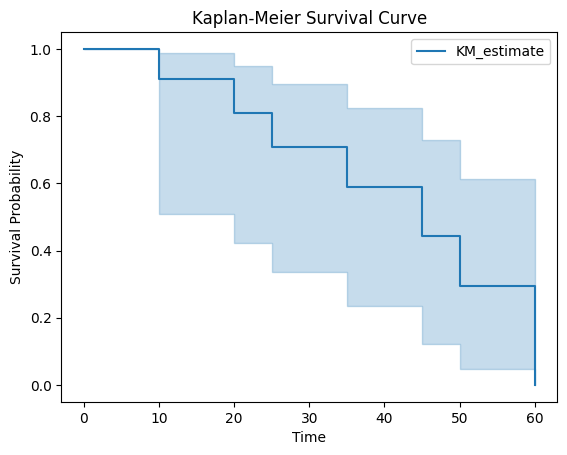

In [3]:
import numpy as np
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

#생존 시간 데이터와 사건 발생 여부 데이터 준비 
time = np.array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]) #생존 시간 데이터
event = np.array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1]) #사건 발생 여부(1:사건발생, 0:오른쪽편향)

#Kaplan-Meier 추정 객체 생성
kmf = KaplanMeierFitter()

#생존 곡선 추정
kmf.fit(time,event)

#생존 곡선 시각화
kmf.plot()
plt.xlabel('Time')
plt.ylabel('Survival Probability')
plt.title('Kaplan-Meier Survival Curve')
plt.show()

>## 2) Cox 비례위험 모형
>- 비모수적 모형 : 생존시간 분포에 대한 가정하지 않고 생존곡선 추정하지 않음
>- 다변량모형 : 여러개의 예측 변수 동시에 고려하여 생존시간 예측하는 다변량 모형
>- 비례위험 가정 : 위험비율은 시간에 따라 변하지 않음

>>### (1) Cox 비례위험모형 순서
>>- 데이터준비 : 생존시간데이터, 예측변수 수집, 편향정보 확인
>>- 모형적합 : Cox모형 적용
>>- 모형평가 : 로그가능도, AIC, BIC 등으로 평가
>>- 결과해석 : 적합된 모형통해 변수들의 상대적 위험비율 및 95% 신뢰구간 계산

>>### (2) 대체로 R로 진행함

>## 3) Log-Rank 검정
>- 비모수적 검정방법 
>- 다변량모형 : 2개 이상 그룹간 생존 곡선 차이 비교
>- 카플란마이어 생존곡선 기반으로 함 
>- 각 그룹 생존시간 데이터 및 오른쪽 편향 데이터 사용

>>### (1) Log-Rank 순서
>>- 데이터 준비 : 그룹간 생존시간 데이터 및 편향정보 수집(각각 독립적)
>>- 생존함수 및 생존곡선 계산 : 카플란마이어 추정법 사용
>>- 검정 통계량 계산 : 관측된 이벤트 수와 기대 이벤트 수 사이의 차이 검정
>>- 유의수준 : 0.05
>>- 자유도 : (그룹수-1)
>>- 가설검정 : 귀무가설 "각 그룹의 생존곡선은 동일하다" 검정 
>>- 결과해석 : 유의수준에 따라 귀무가설 채택 or 기각



>>### (2) Log-Rank 실습

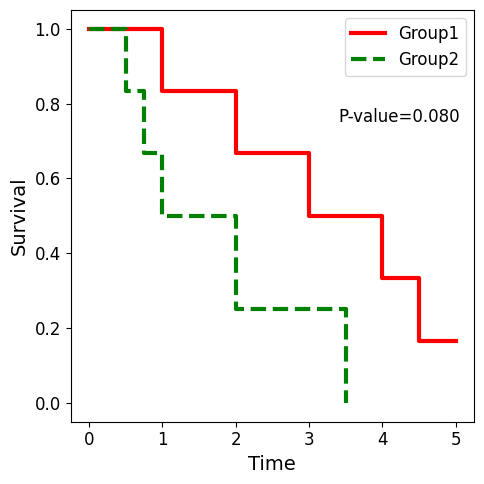

In [5]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np

if __name__=='__main__':
  
  # 1. 데이터셋 입력
  labels = ['Group1', 'Group2']
  groups = [1,1,1,1,1,1,2,2,2,2,2,2]
  events = [1,1,1,1,1,0,1,1,1,0,1,1]
  times = [1, 2, 3, 4, 4.5, 5, 0.5, 0.75, 1, 1.5, 2, 3.5]

  # 2. 데이터 전처리
  E = np.array(events, dtype=np.int32)
  T = np.array(times, dtype=np.float32)

  # 3. matplotlib 설정
  rcParams.update({'font.size':12})
  fig, ax = plt.subplots(figsize=(5,5))
  styles = ['-', '--']
  colors = ['r', 'g']
  lw = 3

  # 4. 카플란마이어 그리기
  kmf = KaplanMeierFitter()
  for i, label in enumerate(labels):
    ix = np.array(groups) == (i+1)
    kmf.fit(T[ix], event_observed=E[ix], label=labels[i])
    kmf.plot(ax=ax, ci_show=False, linewidth=lw, style=styles[i], c=colors[i])

  # 5. LogRank 검정
  ix = np.array(groups) == 2
  result = logrank_test(T[ix], T[~ix], E[ix], E[~ix], alpha=.99)
  pvalue = result.p_value
  ax.text(3.4, 0.75, 'P-value=%.3f'% pvalue)    #위치(3.4, 0.75) 수동으로 저장필요

  # 6. 시각화
  ax.set_xlabel('Time', fontsize=14)
  ax.set_ylabel('Survival', fontsize=14)
  ax.legend(loc='upper right')

  # 7. 그래프 저장하고 출력하기
  plt.tight_layout()
  plt.savefig('ex_kmplot.png', format='png', dpi=300)
  plt.show()